<a href="https://colab.research.google.com/github/TeoAsprilla/tuto-vsco/blob/main/CasoPracticoLasHerramientasdelCientificodeDatos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the LaLiga.xlsx file
uploaded = files.upload()

# Assuming the file is uploaded successfully, you can now read it
if 'LaLiga.xlsx' in uploaded:
    laliga_data = pd.read_excel("LaLiga.xlsx")
    print("File 'LaLiga.xlsx' loaded successfully.")
else:
    print("File 'LaLiga.xlsx' not found after upload.")

Saving LaLiga.xlsx to LaLiga (1).xlsx
File 'LaLiga.xlsx' not found after upload.


In [6]:
# Mostrar las primeras 10 filas de df
laliga_data.head(10)

,Jugador,Clasificación,Club,Posición,Edad,Partidos \njugados,Titular,Min,Goles,Asistencias,Tiros de penalti ejecutados,Tiros de penalti intentados,Tarjetas Amarillas,Tarjetas Rojas,Total de disparos (sin incluir penaltis)
0,Jan Oblak,1,Atlético de Madrid,PO,27,38,38,3.420,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Koke,1,Atlético de Madrid,CC,28,37,34,3.021,1.0,2.0,0.0,0.0,9.0,0.0,17.0
2,Marcos Llorente,1,Atlético de Madrid,CC_DL,25,37,33,2.956,12.0,11.0,0.0,0.0,6.0,0.0,49.0
3,Stefan Savic,1,Atlético de Madrid,DF,29,33,33,2.953,1.0,0.0,0.0,0.0,14.0,0.0,7.0
4,Mario Hermoso,1,Atlético de Madrid,DF,25,31,30,2.578,1.0,1.0,0.0,0.0,6.0,0.0,18.0
5,Luis Suárez,1,Atlético de Madrid,DL,33,32,30,2.508,21.0,3.0,3.0,3.0,6.0,0.0,101.0
6,Ángel Correa,1,Atlético de Madrid,DL_CC,25,38,29,2.393,9.0,8.0,0.0,0.0,3.0,0.0,52.0
7,Kieran Trippier,1,Atlético de Madrid,DF,29,28,28,2.475,0.0,6.0,0.0,0.0,0.0,0.0,3.0
8,Yannick Carrasco,1,Atlético de Madrid,DF_CC,26,30,25,2.179,6.0,10.0,0.0,0.0,6.0,0.0,43.0
9,Felipe,1,Atlético de Madrid,DF,31,31,23,2.057,0.0,0.0,0.0,0.0,8.0,0.0,12.0


In [7]:
# Eliminar filas donde los minutos jugados son menores que 500
laliga_data_clean = laliga_data[laliga_data['Min'] >= 500].copy()

In [8]:
# Renombrar columnas eliminando espacios y saltos de línea
laliga_data_clean.columns = laliga_data_clean.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ')

In [9]:
laliga_data_clean.head()

,Jugador,Clasificación,Club,Posición,Edad,Partidos jugados,Titular,Min,Goles,Asistencias,Tiros de penalti ejecutados,Tiros de penalti intentados,Tarjetas Amarillas,Tarjetas Rojas,Total de disparos (sin incluir penaltis)
15,Héctor Herrera,1,Atlético de Madrid,CC,30,16,8,682.0,0.0,1.0,0.0,0.0,2.0,0.0,7.0
16,Sime Vrsaljko,1,Atlético de Madrid,DL_DF,28,9,6,519.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
17,Geoffrey Kondogbia,1,Atlético de Madrid,CC,27,25,4,611.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0
18,Lucas Torreira,1,Atlético de Madrid,CC,24,19,3,518.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0
51,Dani Carvajal,2,Real Madrid,DF,28,13,11,950.0,0.0,2.0,0.0,0.0,5.0,0.0,9.0


In [10]:
# Agrupar por Club y Posición para calcular promedios de Goles y Asistencias
club_position_avg = laliga_data_clean.groupby(['Club', 'Posición'])[['Goles', 'Asistencias']].mean()

In [11]:
# Ordenar de mayor a menor promedio de Goles
club_position_avg = club_position_avg.sort_values(by='Goles', ascending=False)

In [12]:
club_position_avg

,,Goles,Asistencias
Club,Posición,,
Valencia,DL_CC,5.0,0.0
Sevilla,DL,4.0,2.0
Villarreal,DL,4.0,0.0
Barcelona,DL_CC,3.0,2.0
Real Sociedad,DL,3.0,1.0
...,...,...,...
Levante,PO,0.0,0.0
Real Valladolid,DF,0.0,0.0
Valencia,PO,0.0,0.0


In [13]:
# Diccionario de los Club y sus jugadores
club_dict = {}

for index, row in laliga_data_clean.iterrows():
    club = row['Club']
    jugador = row['Jugador']
    if club not in club_dict:
        club_dict[club] = [jugador]
    else:
        club_dict[club].append(jugador)

In [14]:
club_dict

{'Atlético de Madrid': ['Héctor Herrera',
  'Sime Vrsaljko',
  'Geoffrey Kondogbia',
  'Lucas Torreira'],
 'Real Madrid': ['Dani Carvajal',
  'Rodrygo',
  'Álvaro Odriozola',
  'Isco',
  'Eden Hazard',
  'Mariano'],
 'Barcelona': ['Sergi Roberto',
  'Philippe Coutinho',
  'Neto',
  'Samuel Umtiti',
  'Miralem Pjanic',
  'Ilaix Moriba',
  'Francisco Trincao'],
 'Sevilla': ['Papu Gómez',
  'Munir El Haddadi',
  'Sergi Gómez',
  'Sergio Escudero',
  'Karim Rekik',
  'Aleix Vidal',
  'Óscar Rodríguez Arnaiz'],
 'Real Sociedad': ['Jon Guridi',
  'Willian José',
  'Modibo Sagnan',
  'Joseba Zaldúa',
  'Martín Merquelanz',
  'Roberto López'],
 'Real Betis': ['Antonio Sanabria',
  'Loren Morón',
  'Diego Lainez',
  'Sidnei',
  'Juanmi',
  'Rodri Sánchez'],
 'Villarreal': ['Vicente Iborra',
  'Carlos Bacca',
  'Ramiro Funes Mori',
  'Fernando Niño',
  'Francis Coquelin',
  'Yeremi Pino'],
 'Celta de Vigo': ['José Fontán', 'Emre Mor', 'Kevin Vázquez', 'Miguel Baeza'],
 'Granada': ['Fede Vico', '

In [15]:
# Amarillas
max_amarillas = -1
jugador_max_amarillas = ''

for index, row in laliga_data_clean.iterrows():
    if row['Tarjetas Amarillas'] > max_amarillas:
        max_amarillas = row['Tarjetas Amarillas']
        jugador_max_amarillas = row['Jugador']

print(f'Jugador con más tarjetas amarillas: {jugador_max_amarillas} ({max_amarillas})')

Jugador con más tarjetas amarillas: Dani Carvajal (5.0)


In [16]:
# Rojas
max_rojas = -1
jugador_max_rojas = ''

for index, row in laliga_data_clean.iterrows():
    if row['Tarjetas Rojas'] > max_rojas:
        max_rojas = row['Tarjetas Rojas']
        jugador_max_rojas = row['Jugador']

print(f'Jugador con más tarjetas rojas: {jugador_max_rojas} ({max_rojas})')

Jugador con más tarjetas rojas: José Fontán (1.0)


In [17]:
# Funcion promedio de goles
def promedio_goles(lista_goles):
    return sum(lista_goles) / len(lista_goles)

In [19]:
# Lista de jugadpres que comienzan con 'M' sin distincion de mayusculas
jugadores_m = [jugador for jugador in laliga_data_clean['Jugador'] if jugador.lower().startswith('m')]
print(jugadores_m)

['Mariano', 'Miralem Pjanic', 'Munir El Haddadi', 'Modibo Sagnan', 'Martín Merquelanz', 'Miguel Baeza', 'Manuel Sánchez', 'Manu Vallejo', 'Míchel', 'Miguel Atienza']


In [20]:
# Diccionario de Posiciones y sus jugadores
posiciones_dict = {}

for index, row in laliga_data_clean.iterrows():
    posicion = row['Posición']
    jugador = row['Jugador']
    if posicion not in posiciones_dict:
        posiciones_dict[posicion] = [jugador]
    else:
        posiciones_dict[posicion].append(jugador)

In [21]:
posiciones_dict

{'CC': ['Héctor Herrera',
  'Geoffrey Kondogbia',
  'Lucas Torreira',
  'Isco',
  'Miralem Pjanic',
  'Ilaix Moriba',
  'Jon Guridi',
  'Vicente Iborra',
  'Francis Coquelin',
  'Darko Brasanac',
  'Jon Ander Garrido',
  'Alejandro Blanco',
  'Nikola Vukcevic',
  'José Campaña',
  'Omenuke Mfulu',
  'Idrissa Doumbia',
  'Míchel',
  'Miguel Atienza',
  'Recio'],
 'DL_DF': ['Sime Vrsaljko'],
 'DF': ['Dani Carvajal',
  'Álvaro Odriozola',
  'Samuel Umtiti',
  'Sergi Gómez',
  'Sergio Escudero',
  'Karim Rekik',
  'Aleix Vidal',
  'Modibo Sagnan',
  'Joseba Zaldúa',
  'Sidnei',
  'Ramiro Funes Mori',
  'José Fontán',
  'Kevin Vázquez',
  'Nehuén Pérez',
  'Víctor Díaz',
  'Iñigo Lekue',
  'Manuel Sánchez',
  'Carlos Akapo',
  'Pedro Alcalá',
  'Toni Lato',
  'Coke',
  'Sofian Chakla',
  'Xabier Etxeita',
  'Tachi',
  'Helibelton Palacios',
  'Denis Vavro',
  'Gastón Silva',
  'Javi Sánchez',
  'José Ángel'],
 'DL': ['Rodrygo',
  'Mariano',
  'Munir El Haddadi',
  'Willian José',
  'Antonio

In [23]:
# Lista de diccionarios de jugadores (Nombre, Goles, Asistencias)
jugadores_stats = []

for index, row in laliga_data_clean.iterrows():
    jugador_dict = {
        'Jugador': row['Jugador'],
        'Goles': row['Goles'],
        'Asistencias': row['Asistencias']}
    jugadores_stats.append(jugador_dict)

for jugador in jugadores_stats:
    print(jugador)

{'Jugador': 'Héctor Herrera', 'Goles': 0.0, 'Asistencias': 1.0}
{'Jugador': 'Sime Vrsaljko', 'Goles': 0.0, 'Asistencias': 0.0}
{'Jugador': 'Geoffrey Kondogbia', 'Goles': 0.0, 'Asistencias': 0.0}
{'Jugador': 'Lucas Torreira', 'Goles': 1.0, 'Asistencias': 0.0}
{'Jugador': 'Dani Carvajal', 'Goles': 0.0, 'Asistencias': 2.0}
{'Jugador': 'Rodrygo', 'Goles': 1.0, 'Asistencias': 6.0}
{'Jugador': 'Álvaro Odriozola', 'Goles': 2.0, 'Asistencias': 0.0}
{'Jugador': 'Isco', 'Goles': 0.0, 'Asistencias': 2.0}
{'Jugador': 'Eden Hazard', 'Goles': 3.0, 'Asistencias': 2.0}
{'Jugador': 'Mariano', 'Goles': 1.0, 'Asistencias': 0.0}
{'Jugador': 'Sergi Roberto', 'Goles': 1.0, 'Asistencias': 2.0}
{'Jugador': 'Philippe Coutinho', 'Goles': 2.0, 'Asistencias': 2.0}
{'Jugador': 'Neto', 'Goles': 0.0, 'Asistencias': 0.0}
{'Jugador': 'Samuel Umtiti', 'Goles': 0.0, 'Asistencias': 0.0}
{'Jugador': 'Miralem Pjanic', 'Goles': 0.0, 'Asistencias': 0.0}
{'Jugador': 'Ilaix Moriba', 'Goles': 1.0, 'Asistencias': 2.0}
{'Jugador'

In [24]:
# Funcion promedio de tarjetas amarillas por partido
def promedio_amarillas_por_partido(fila):
    return fila['Tarjetas Amarillas'] / fila['Partidos jugados']

In [25]:
# Corregimos el nombre de la columna "Partidos jugados"
laliga_data_clean.rename(columns={'Partidos  jugados': 'Partidos jugados'}, inplace=True)

In [27]:
# Aplicamos la función y creamos nueva columna
laliga_data_clean['Promedio Amarillas x Partido'] = laliga_data_clean.apply(promedio_amarillas_por_partido, axis=1)

laliga_data_clean[['Jugador', 'Promedio Amarillas x Partido']].head()

,Jugador,Promedio Amarillas x Partido
15,Héctor Herrera,0.125000
16,Sime Vrsaljko,0.222222
17,Geoffrey Kondogbia,0.160000
18,Lucas Torreira,0.105263
51,Dani Carvajal,0.384615


In [28]:
# Jugadores con >5 y <3 tarjetas rojas
jugadores_filtrados = laliga_data_clean[(laliga_data_clean['Goles'] > 5) & (laliga_data_clean['Tarjetas Rojas'] < 3)].copy()

In [29]:
# Reindexar desde 1
jugadores_filtrados.index = range(1, len(jugadores_filtrados) + 1)

In [30]:
jugadores_filtrados

,Jugador,Clasificación,Club,Posición,Edad,Partidos jugados,Titular,Min,Goles,Asistencias,Tiros de penalti ejecutados,Tiros de penalti intentados,Tarjetas Amarillas,Tarjetas Rojas,Total de disparos (sin incluir penaltis),Promedio Amarillas x Partido


In [32]:
# Tabla Pivote (Promedio de goles y asistencia por posicion)
pivot_stats = laliga_data_clean.pivot_table(index='Posición', values=['Goles', 'Asistencias'], aggfunc='mean')

pivot_stats

,Asistencias,Goles
Posición,,
CC,0.421053,0.473684
CC_DL,0.733333,1.000000
DF,0.310345,0.172414
DF_CC,0.000000,0.333333
DF_DL,2.000000,0.500000
DL,1.272727,2.181818
DL_CC,0.833333,1.666667
DL_DF,0.000000,0.000000
PO,0.000000,0.000000


In [34]:
# Indice de efectividad (Goles + Asistencias / Minutos)
laliga_data_clean['Efectividad'] = (laliga_data_clean['Goles'] + laliga_data_clean['Asistencias']) / laliga_data_clean['Min']

laliga_data_clean[['Jugador', 'Efectividad']].head()


,Jugador,Efectividad
15,Héctor Herrera,0.001466
16,Sime Vrsaljko,0.000000
17,Geoffrey Kondogbia,0.000000
18,Lucas Torreira,0.001931
51,Dani Carvajal,0.002105


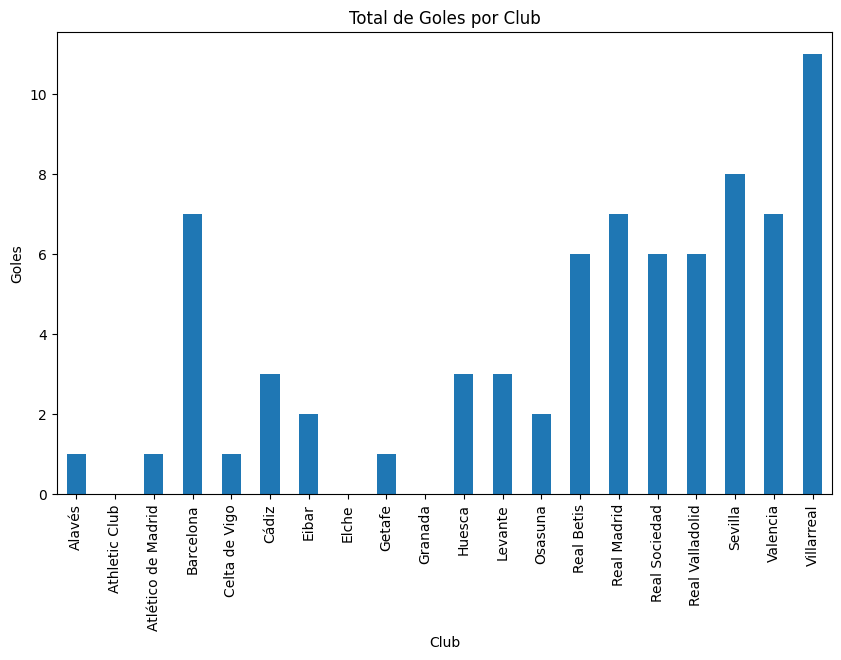

In [35]:
# Grafico de barras: Suma total de goles por club
goles_por_club = laliga_data_clean.groupby('Club')['Goles'].sum()

goles_por_club.plot(kind='bar', figsize=(10,6))
plt.title('Total de Goles por Club')
plt.xlabel('Club')
plt.ylabel('Goles')
plt.show()

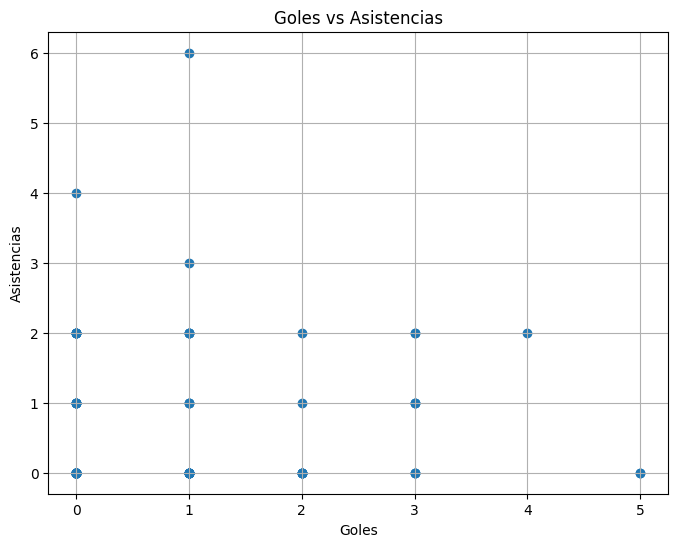

In [36]:
# Grafico de dispersion; Goles vs Asistencias
plt.figure(figsize=(8,6))
plt.scatter(laliga_data_clean['Goles'], laliga_data_clean['Asistencias'])
plt.title('Goles vs Asistencias')
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.grid(True)
plt.show()

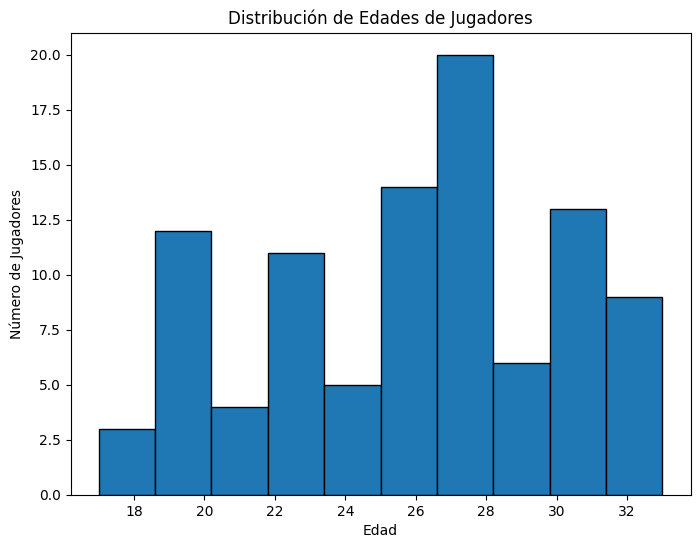

In [37]:
# Histograma de edades
plt.figure(figsize=(8,6))
plt.hist(laliga_data_clean['Edad'], bins=10, edgecolor='black')
plt.title('Distribución de Edades de Jugadores')
plt.xlabel('Edad')
plt.ylabel('Número de Jugadores')
plt.show()